> Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

> Loading Dataset

In [2]:
sales = sales = pd.read_csv('../Data/Data After Milestone 1.csv', encoding='latin-1')
sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,1,0,6,2,0,6,2,246.490581,246.490581,246.490581
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,2,1,0,0,5,9,3,246.490581,246.490581,246.490581
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,0,0,0,2,13,9,0,246.490581,246.490581,246.490581
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,0,2,4,2,13,3,3,246.490581,246.490581,246.490581
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,1,0,1,2,6,0,0,246.490581,246.490581,246.490581


# 1. Advanced Data Analysis: 

### • Conduct time series analysis to identify trends, seasonality, and cyclic patterns.

### • Use statistical tests (e.g., ADF test for stationarity) to ensure data suitability for time series modeling. 

In [4]:
from statsmodels.tsa.stattools import adfuller

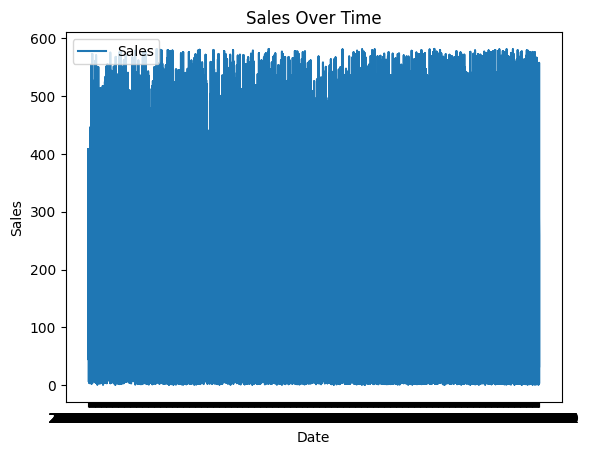

In [5]:
sales = sales.sort_values('Order Date') 
plt.plot(sales['Order Date'], sales['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()

In [6]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] <= 0.05:
        print("\n The data is stationary (reject null hypothesis).")
    else:
        print("\n The data is non-stationary (fail to reject null hypothesis).")

adf_test(sales['Sales'])


ADF Test Results:
ADF Statistic: -158.6668799781404
p-value: 0.0
Critical Values:
   1%: -3.4304775079418035
   5%: -2.861596355922802
   10%: -2.566799996388417

 The data is stationary (reject null hypothesis).


In [7]:
# Understanding the ADF Test Results
# ADF Statistic: -158.29
# This is the test statistic calculated by the ADF test.
# The more negative this value is, the stronger the evidence that the data is stationary.
#---------------------------------------------------------------------------------------------------
# p-value: 0.0
# The p-value tells us whether to reject or fail to reject the null hypothesis:
# If p-value ≤ 0.05 → Reject the null hypothesis → Data is stationary .
# If p-value > 0.05 → Fail to reject the null hypothesis → Data is non-stationary .
# Since p-value is 0.0, we strongly reject the null hypothesis, confirming that the data is already stationary.
#---------------------------------------------------------------------------------------------------
# Critical Values
# These values help compare the ADF Statistic:
# 1% Level: -3.430
# 5% Level: -2.862
# 10% Level: -2.567
# If the ADF Statistic (-158.29) is lower (more negative) than the critical values, it confirms stationarity.
# In our case, -158.29 is much lower than all critical values, so we confirm stationarity.
# What Does This Mean for our Forecasting?
# Because our data is already stationary, I do NOT need to transform it like differencing or log transformation.

array(['Hungary', 'Australia', 'Algeria', 'Sweden', 'Canada',
       'United Kingdom', 'New Zealand', 'Iran', 'Guatemala', 'Tanzania',
       'Iraq', 'Philippines', 'Thailand', 'Malaysia', 'Brazil', 'Cuba',
       'Japan', 'Mexico', 'Sudan', 'United States', 'France', 'Taiwan',
       'Indonesia', 'Vietnam', 'China', 'Angola', 'Lebanon', 'Mozambique',
       'Singapore', 'Netherlands', 'Nigeria', 'South Africa', 'Egypt',
       'Venezuela', 'Austria', 'India', 'Spain', 'Turkey', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'Denmark',
       'El Salvador', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)',
       'Russia', 'Mongolia', 'Kenya', 'Belgium', 'Colombia', 'Estonia',
       'Madagascar', 'Morocco', 'Norway', 'Portugal', 'Sierra Leone',
       'Czech Republic', 'Central African Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Moldova',
       'Switzerland', 'Uganda', 'Zimbabwe', 'Senegal', 'Hong Kong',
       'Niger', 'Democratic Republic o

### • Perform correlation analysis to explore the relationships between features such as sales, promotions, holidays, and weather.

# 2. Feature Engineering:

### • Create time series features like rolling averages, lag features, and seasonal components (e.g., holiday effects, month). 

### • Perform feature transformations such as scaling, encoding, and aggregating features (e.g., monthly sales totals). 

### • Introduce external factors like weather, promotions, or economic conditions to improve the forecast accuracy. 

In [9]:
sales['Country'].unique()

array(['Hungary', 'Australia', 'Algeria', 'Sweden', 'Canada',
       'United Kingdom', 'New Zealand', 'Iran', 'Guatemala', 'Tanzania',
       'Iraq', 'Philippines', 'Thailand', 'Malaysia', 'Brazil', 'Cuba',
       'Japan', 'Mexico', 'Sudan', 'United States', 'France', 'Taiwan',
       'Indonesia', 'Vietnam', 'China', 'Angola', 'Lebanon', 'Mozambique',
       'Singapore', 'Netherlands', 'Nigeria', 'South Africa', 'Egypt',
       'Venezuela', 'Austria', 'India', 'Spain', 'Turkey', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'Denmark',
       'El Salvador', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)',
       'Russia', 'Mongolia', 'Kenya', 'Belgium', 'Colombia', 'Estonia',
       'Madagascar', 'Morocco', 'Norway', 'Portugal', 'Sierra Leone',
       'Czech Republic', 'Central African Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Moldova',
       'Switzerland', 'Uganda', 'Zimbabwe', 'Senegal', 'Hong Kong',
       'Niger', 'Democratic Republic o

In [10]:
pd.set_option('display.max_columns', None)
sales.sample(5)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days),Promotion_Flag,Promotion_Above_Avg,Week,Day_of_Month,Holiday,Order Priority_Encoded,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
37845,2013-07-03,2013-07-08,Standard Class,Christina VanderZanden,Consumer,Garoua,Nord,Cameroon,Africa,Africa,Furniture,Furnishings,"Eldon Stacking Tray, Duo Pack",31.560,1,0.0,3.780,2.78,Medium,7,3,2013,2,0,0,Summer,31.560,5,0,0,27,3,0,3,3,0,1,0,9,0,2,41.520,21.500,132.440
15182,2011-06-24,2011-06-29,Standard Class,John Huston,Consumer,Jeddah,Makkah,Saudi Arabia,EMEA,EMEA,Technology,Phones,"Samsung Office Telephone, VoIP",391.860,6,0.0,9.240,19.40,Medium,6,2,2011,4,0,0,Summer,2351.160,5,0,0,25,24,0,3,3,0,3,2,13,5,2,479.952,299.850,253.800
25756,2014-09-23,2014-09-29,Standard Class,Victoria Pisteka,Corporate,Singapore,Singapore,Singapore,APAC,Southeast Asia,Office Supplies,Supplies,"Fiskars Trimmer, Steel",166.800,4,0.0,15.000,7.72,Medium,9,3,2014,1,0,0,Fall,667.200,6,0,0,39,23,0,3,3,1,0,1,15,11,0,38.100,60.654,52.860
33141,2014-12-23,2014-12-29,Standard Class,Jenna Caffey,Consumer,Praia Grande,São Paulo,Brazil,LATAM,South,Office Supplies,Supplies,"Acme Trimmer, Easy Grip",92.400,3,0.0,34.140,4.22,Low,12,4,2014,1,0,0,Winter,277.200,6,0,0,52,23,0,2,3,0,5,1,15,10,3,39.870,57.480,26.370
20521,2013-03-15,2013-03-17,First Class,Speros Goranitis,Consumer,Sydney,New South Wales,Australia,APAC,Oceania,Office Supplies,Fasteners,"Stockwell Thumb Tacks, 12 Pack",56.565,5,0.1,5.565,11.95,High,3,1,2013,4,0,0,Spring,282.825,2,1,1,11,15,0,1,0,0,0,1,8,9,1,92.583,227.976,190.512


In [11]:
fig = px.bar(sales, x='Country', y='Sales', title='  Total sales per country  ')
fig.update_traces(marker_color='red')

fig.show()

In [13]:
total_sales_per_country = sales.groupby('Country')['Sales'].sum().reset_index()

def categorize_economic(total_sales):
    if total_sales < 3000:
        return 'Very Low'
    elif 3000 <= total_sales < 20000:
        return 'Low'
    elif 20000 <= total_sales < 60000:
        return 'Medium'
    else:
        return 'High'
total_sales_per_country['Economic_condition'] = total_sales_per_country['Sales'].apply(lambda x: categorize_economic(x))

sales_with_economic = sales.merge(total_sales_per_country[['Country', 'Economic_condition']], on='Country')

sales = sales_with_economic

In [14]:
pd.set_option('display.max_columns',None)
sales.sample(2)


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days),Promotion_Flag,Promotion_Above_Avg,Week,Day_of_Month,Holiday,Order Priority_Encoded,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D,Economic_condition
1375,2011-04-02,2011-04-06,Second Class,Dianna Wilson,Home Office,Limoeiro do Norte,Ceará,Brazil,LATAM,South,Technology,Copiers,"Canon Personal Copier, Color",114.76728,3,0.0,9.240,9.80,High,4,2,2011,5,1,0,Spring,344.30184,4,0,0,13,2,0,1,2,2,5,2,6,10,1,97.80,38.388,53.676,High
19564,2012-12-22,2012-12-23,First Class,Charlotte Melton,Consumer,Tamworth,New South Wales,Australia,APAC,Oceania,Office Supplies,Fasteners,"Stockwell Rubber Bands, Bulk Pack",133.89300,9,0.1,22.113,19.71,High,12,4,2012,5,1,0,Winter,1205.03700,1,1,1,51,22,0,1,0,0,0,1,8,9,3,138.96,83.460,279.950,High
